In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("Churn_Modelling.csv")

In [3]:
print(dataset.to_string())

      RowNumber  CustomerId                  Surname  CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
0             1    15634602                 Hargrave          619    France  Female   42       2       0.00              1          1               1        101348.88       1
1             2    15647311                     Hill          608     Spain  Female   41       1   83807.86              1          0               1        112542.58       0
2             3    15619304                     Onio          502    France  Female   42       8  159660.80              3          1               0        113931.57       1
3             4    15701354                     Boni          699    France  Female   39       1       0.00              2          0               0         93826.63       0
4             5    15737888                 Mitchell          850     Spain  Female   43       2  125510.82              1   

In [4]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

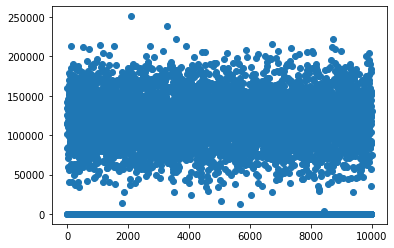

In [5]:
#Univariate
plt.scatter(dataset.index,dataset['Balance'])
plt.show()

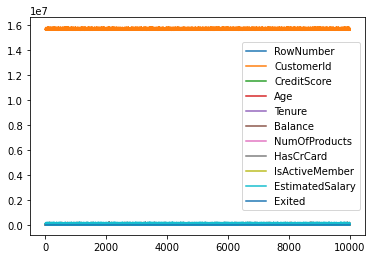

In [6]:
#Bivariate Analysis
dataset.plot.line()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d8c1dcbd0>,
      dtype=object)

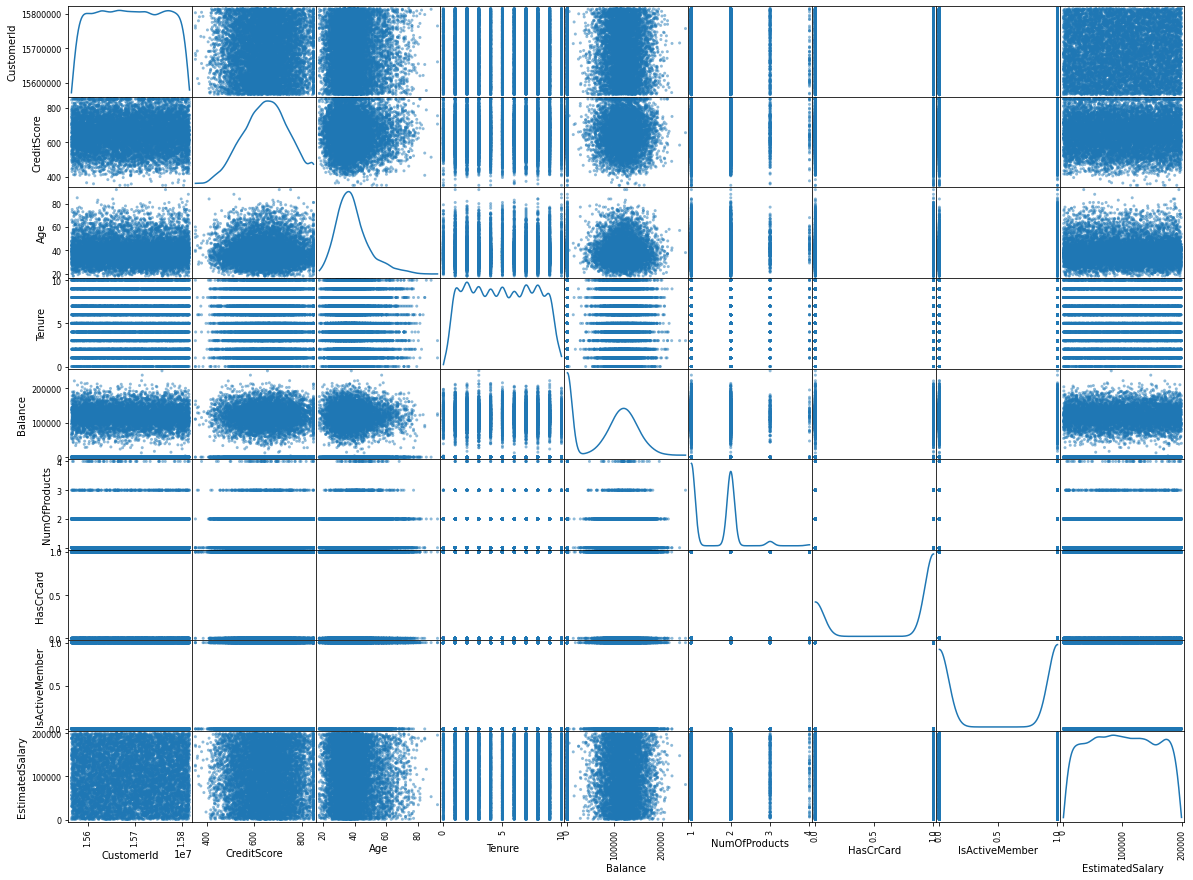

In [7]:
#Multivariate Analysis
pd.plotting.scatter_matrix(dataset.loc[:, "CustomerId":"EstimatedSalary"], diagonal="kde",figsize=(20,15))

In [8]:
#Perform Descriptive Statistics on dataset

stats = dataset['Balance'].describe()
print(stats)

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64


In [9]:
#Handle Missing Values
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


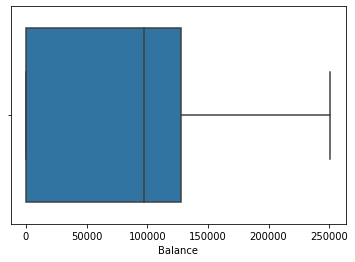

In [10]:
#Find the outliers and replace outliers
import seaborn as sns
sns.boxplot(dataset['Balance'],data=dataset)

In [11]:
#Categorical columns and perform encoding
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
#Categorical columns and perform encoding
pd.get_dummies(dataset, columns=["Tenure"]).head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,...,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10
0,1,15634602,Hargrave,619,France,Female,42,0.00,1,1,...,0,1,0,0,0,0,0,0,0,0
1,2,15647311,Hill,608,Spain,Female,41,83807.86,1,0,...,1,0,0,0,0,0,0,0,0,0
2,3,15619304,Onio,502,France,Female,42,159660.80,3,1,...,0,0,0,0,0,0,0,1,0,0
3,4,15701354,Boni,699,France,Female,39,0.00,2,0,...,1,0,0,0,0,0,0,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,125510.82,1,1,...,0,1,0,0,0,0,0,0,0,0


In [13]:
#Categorical columns and perform encoding
pd.get_dummies(dataset, columns=["Geography"]).head()


,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [14]:
#Split data into independent and dependent variables
X = dataset.iloc[:, :-1].values
print(X)

[[1 15634602 'Hargrave' ... 1 1 101348.88]
 [2 15647311 'Hill' ... 0 1 112542.58]
 [3 15619304 'Onio' ... 1 0 113931.57]
 ...
 [9998 15584532 'Liu' ... 0 1 42085.58]
 [9999 15682355 'Sabbatini' ... 1 0 92888.52]
 [10000 15628319 'Walker' ... 1 0 38190.78]]


In [15]:
#dependent variable
Y = dataset.iloc[:, -1].values
print(Y)

[1 0 1 ... 1 1 0]


In [16]:
#Scaling Independent Variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset[["ScaledPrice"]] = scaler.fit_transform(dataset[["EstimatedSalary"]])
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,ScaledPrice
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.506735
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.562709
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.569654
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.469120
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.395400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0.481341
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0.508490
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0.210390
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0.464429


In [17]:
#split The data into training and testing 

from sklearn.model_selection import train_test_split
y1 = dataset.CreditScore
x1 = dataset.drop('CreditScore',axis=1)
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2)
print(x1_test.shape)
print(x1_train.shape)
print(y1_test.shape)
print(y1_train.shape)

(2000, 14)
(8000, 14)
(2000,)
(8000,)
